In [40]:
%matplotlib inline

In [41]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Get Fruityvice API
url = "https://www.fruityvice.com"
endpoint = "/api/fruit/all"
resp = requests.get(url + endpoint)

if resp.status_code == 200:
    fruit_data = resp.json()
else:
    print("Failed to retrieve data.")

In [43]:
# Create new pandas DataFrame to hold fruit data
df = pd.DataFrame(fruit_data)
df_nutrients = pd.json_normalize(df['nutritions'])
df = pd.concat([df, df_nutrients], axis=1)
df.drop(columns=['nutritions'], inplace=True)

# Create new column that stores the calculated results of carb to sugar ratio for each row
df['carb-to-sugar ratio'] = df['carbohydrates'] / df['sugar']
df

,name,id,family,order,genus,calories,fat,sugar,carbohydrates,protein,carb-to-sugar ratio
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00,1.000000
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80,1.018519
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00,1.279070
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90,1.500000
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40,1.500000
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50,4.014815
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30,2.000000
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75,1.968641
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10,1.666667
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80,1.133333


In [44]:
# Create new DataFrame to store selected columns
selected_data_columns = ['name', 'id', 'family', 'sugar', 'carbohydrates', 'carb-to-sugar ratio']
df_new = df[selected_data_columns]
df_sorted = df_new.sort_values(by='carb-to-sugar ratio', ascending=False)
df_sorted

,name,id,family,sugar,carbohydrates,carb-to-sugar ratio
12,Gooseberry,69,Grossulariaceae,0.00,10.00,inf
41,Horned Melon,95,Cucurbitaceae,0.50,7.56,15.120000
35,Avocado,84,Lauraceae,0.66,8.53,12.924242
25,Papaya,42,Caricaceae,1.00,11.00,11.000000
29,Lime,44,Rutaceae,1.70,8.40,4.941176
5,Durian,60,Malvaceae,6.75,27.10,4.014815
42,Hazelnut,96,Betulaceae,4.30,17.00,3.953488
19,Lemon,26,Rutaceae,2.50,9.00,3.600000
37,Cranberry,87,Ericaceae,4.00,12.20,3.050000
17,Raspberry,23,Rosaceae,4.40,12.00,2.727273


In [45]:
# Print top five fruits that have high carbs, low sugar ratio
top_5 = df_sorted.head(5)
print(top_5)

# Print the five fruits that have low carbs, high sugar ratio
last_5 = df_sorted.tail(5)
print(last_5)

            name  id           family  sugar  carbohydrates  \
12    Gooseberry  69  Grossulariaceae   0.00          10.00   
41  Horned Melon  95    Cucurbitaceae   0.50           7.56   
35       Avocado  84        Lauraceae   0.66           8.53   
25        Papaya  42       Caricaceae   1.00          11.00   
29          Lime  44         Rutaceae   1.70           8.40   

    carb-to-sugar ratio  
12                  inf  
41            15.120000  
35            12.924242  
25            11.000000  
29             4.941176  
          name  id         family  sugar  carbohydrates  carb-to-sugar ratio
15      Orange   2       Rutaceae    8.2            8.3             1.012195
26       Melon  41  Cucurbitaceae    8.0            8.0             1.000000
0    Persimmon  52      Ebenaceae   18.0           18.0             1.000000
27   Tangerine  77       Rutaceae    9.1            8.3             0.912088
16  GreenApple  72       Rosaceae    6.4            3.1             0.484375


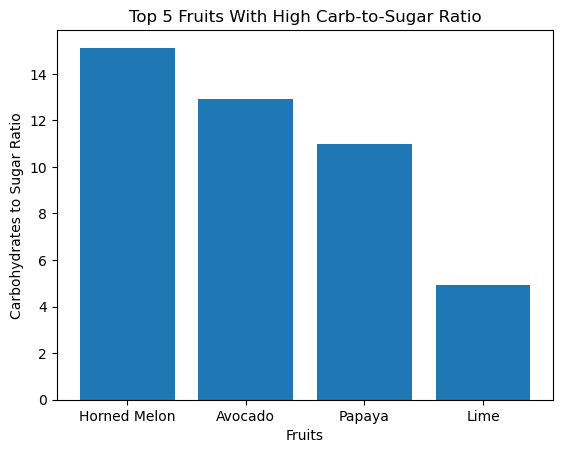

In [46]:
# Bar Graph for Top 5 Fruits w/ High Carbs/Low Sugar
plt.bar(top_5['name'], top_5['carb-to-sugar ratio'])
plt.xlabel("Fruits")
plt.ylabel("Carbohydrates to Sugar Ratio")
plt.title("Top 5 Fruits With High Carb-to-Sugar Ratio")
plt.show()

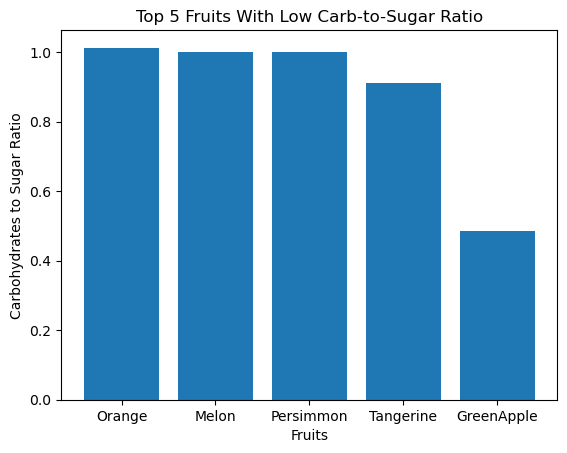

In [47]:
# Bar Graph for Top 5 Fruits w/ Low Carbs/High Sugar
plt.bar(last_5['name'], last_5['carb-to-sugar ratio'])
plt.xlabel("Fruits")
plt.ylabel("Carbohydrates to Sugar Ratio")
plt.title("Top 5 Fruits With Low Carb-to-Sugar Ratio")
plt.show()

In [48]:
# Calculate the average ratio for each family type
average_family_ratio = df_sorted.groupby('family')['carb-to-sugar ratio'].mean().reset_index()
sorted_family_ratio = average_family_ratio.sort_values(by='carb-to-sugar ratio', ascending=False)
sorted_family_ratio

,family,carb-to-sugar ratio
10,Grossulariaceae,inf
11,Lauraceae,12.924242
5,Caricaceae,11.000000
7,Cucurbitaceae,5.817778
13,Malvaceae,4.014815
2,Betulaceae,3.953488
9,Ericaceae,2.509321
19,Rutaceae,2.320621
16,Myrtaceae,2.111111
17,Passifloraceae,2.000000
